# 02. K-Means Clustering


### 환경 설정 

라이브러리

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
from matplotlib import rc
%matplotlib inline

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus'] = False 

from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score

## 1. K-Means Clustering
클러스터링 결과를 분석 목표에 맞게 수정한다.

In [49]:
scaling_data = pd.read_csv("./data/scaling_data.csv")
sales_data = pd.read_csv('./data/sales_data.csv')

In [50]:
scaling_data = scaling_data.drop(['Unnamed: 0'], axis=1)

In [51]:
scaling_data

,상권_구분_코드_명,상권_코드_명,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,관공서_수,은행_수,...,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
0,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.070107,0.070260
1,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.077951,0.080686
2,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.077503,0.075824
3,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.057336,0.047619,0.126984,...,0.0,0.069767,1.0,0.0,0.000000,0.0,0.173077,0.0,0.083390,0.084133
4,관광특구,강남 마이스 관광특구,0.024849,0.151712,0.108911,0.001176,0.0,0.087690,0.190476,0.158730,...,0.0,0.046512,1.0,0.0,0.117647,0.0,0.269231,0.0,0.070107,0.070260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19846,전통시장,"동원전통종합시장(동원시장, 동원전통시장 상점가)",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.048877,0.039122
19847,전통시장,"이화여대 3,5,7길 상점가",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.017757,0.019326
19848,전통시장,"이화여대 3,5,7길 상점가",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.023586,0.027619
19849,전통시장,"이화여대 3,5,7길 상점가",0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.020424,0.022618


In [53]:
num_columns = ['총_생활인구_수', '총_직장_인구_수', '점포_수', '총_상주인구_수',
       '아파트_단지_수', '집객시설_수', '은행_수',
       '종합병원_수', '일반_병원_수', '약국_수', '백화점_수', '슈퍼마켓_수', '극장_수', '숙박_시설_수',
       '교통시설_수', '학교_수', '분기당_매출_금액', '분기당_매출_건수']
num_data = scaling_data[num_columns].groupby(scaling_data['상권_코드_명']).mean()
# num_data = scaling_data[num_columns]



In [54]:
num_data

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수
상권_코드_명,,,,,,,,,,,,,,,,,,
4.19민주묘지역 2번,0.0,0.000000,0.0,0.056830,0.033086,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.012894,0.011020
63빌딩,0.0,0.000000,0.0,0.015086,0.001323,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.031690,0.031395
DMC(디지털미디어시티),0.0,0.000000,0.0,0.050213,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.203675,0.190337
GS강동자이아파트,0.0,0.000000,0.0,0.162994,0.078216,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.019868,0.015362
G타워,0.0,0.000000,0.0,0.207774,0.019852,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.057567,0.045893
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흑리단길,0.0,0.000000,0.0,0.025088,0.001323,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.035732,0.029476
흑석2치안센터,0.0,0.000000,0.0,0.035572,0.030439,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
흑석로13길,0.0,0.000735,0.0,0.000000,0.000000,0.016020,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.017361,0.012019,0.0,0.000000,0.000000


### 1-1. 클러스터의 개수 k 설정

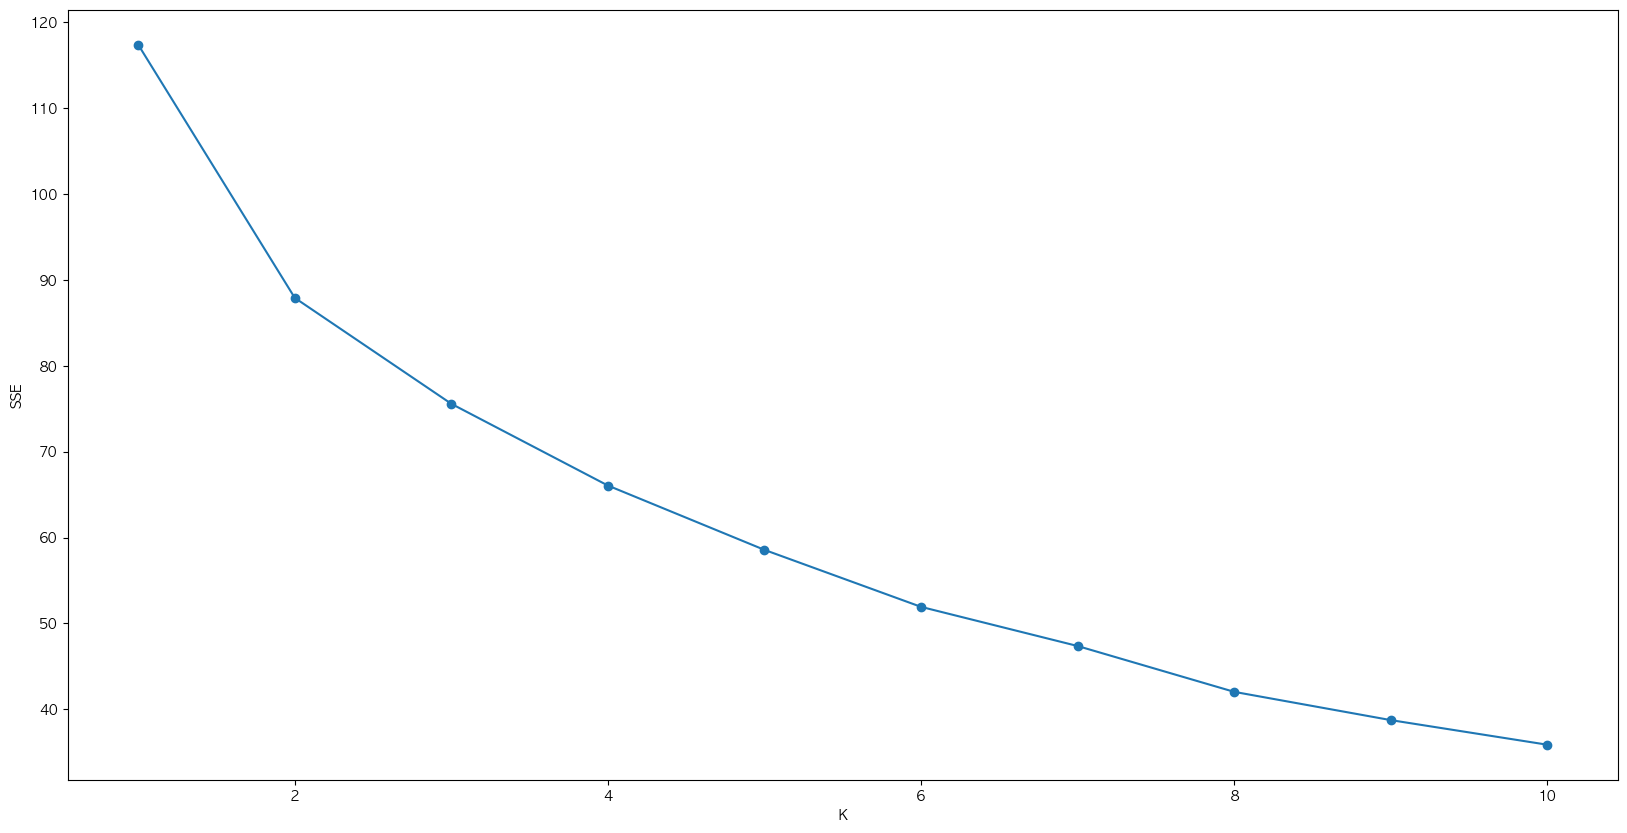

In [55]:
def elbow(X):
    sse = []

    for i in range(1,11):
        km = KMeans(n_clusters=i,algorithm='auto', random_state=42)
        km.fit(X)
        sse.append(km.inertia_)

    plt.plot(range(1,11), sse, marker='o')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.show()

elbow(num_data)

In [56]:
best_n = 1 
best_score = -1

for n_cluster in range(2, 11): 
  kmeans = KMeans(n_clusters=n_cluster) 
  kmeans.fit(num_data) 
  cluster = kmeans.predict(num_data) 
  score = silhouette_score(num_data, cluster)

  print('k = {} 일 때의 실루엣 점수 : {:.2f}'.format(n_cluster, score))

  if score > best_score :
      best_n = n_cluster
      best_score = score

print('k = {} 일 때 가장 높은 실루엣 점수 {:.2f}을 얻는다'.format(best_n, best_score))

k = 2 일 때의 실루엣 점수 : 0.48
k = 3 일 때의 실루엣 점수 : 0.52
k = 4 일 때의 실루엣 점수 : 0.52
k = 5 일 때의 실루엣 점수 : 0.39
k = 6 일 때의 실루엣 점수 : 0.41
k = 7 일 때의 실루엣 점수 : 0.41
k = 8 일 때의 실루엣 점수 : 0.41
k = 9 일 때의 실루엣 점수 : 0.42
k = 10 일 때의 실루엣 점수 : 0.33
k = 4 일 때 가장 높은 실루엣 점수 0.52을 얻는다


### 1-2. 클러스터링

In [57]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=42)
cluster = kmeans.fit_predict(num_data)
cluster

array([1, 1, 1, ..., 1, 1, 1], dtype=int32)

In [58]:
num_data['cluster'] = cluster

In [59]:
num_data.head()

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,cluster
상권_코드_명,,,,,,,,,,,,,,,,,,,
4.19민주묘지역 2번,0.0,0.0,0.0,0.056830,0.033086,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012894,0.011020,1
63빌딩,0.0,0.0,0.0,0.015086,0.001323,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.031690,0.031395,1
DMC(디지털미디어시티),0.0,0.0,0.0,0.050213,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.203675,0.190337,1
GS강동자이아파트,0.0,0.0,0.0,0.162994,0.078216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019868,0.015362,2
G타워,0.0,0.0,0.0,0.207774,0.019852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057567,0.045893,2


In [18]:
# num_data.to_csv('./data/cluster_data.csv')

Text(0, 0.5, '표준 데이터 값')

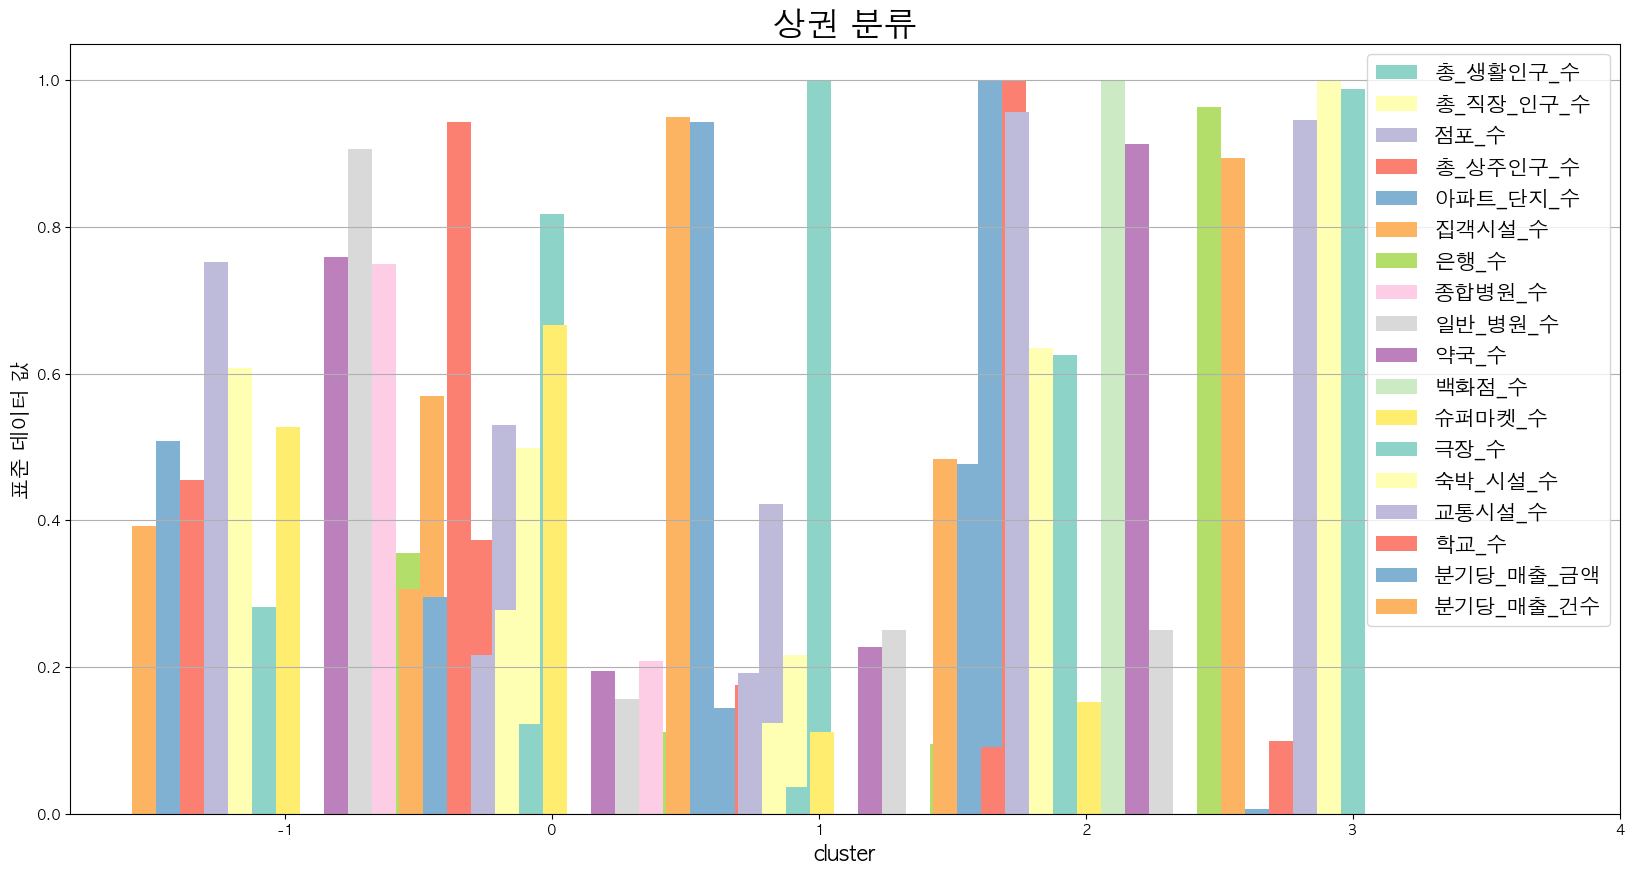

In [19]:
# plt.rcParams['figure.figsize'] = (20, 10)
# color = sns.color_palette("Set3", len(num_data.columns))

# for idx, column in enumerate(num_columns):
#   plt.bar(num_data['cluster'] - idx * 0.09, num_data[column], label=column, width=0.09, color=color[idx])

# plt.title('상권 분류', fontsize=24)
# plt.legend(fontsize=15)
# plt.grid(True, axis='y')
# plt.xticks([-1, 0, 1, 2, 3, 4])
# plt.xlabel('cluster', fontsize=15)
# plt.ylabel('표준 데이터 값', fontsize=15)

## 2. K-Means Clustering 결과 분석

In [28]:
k = 4
model = KMeans(n_clusters = k, random_state = 10)
model.fit(num_data)
num_data['cluster'] = model.fit_predict(num_data)

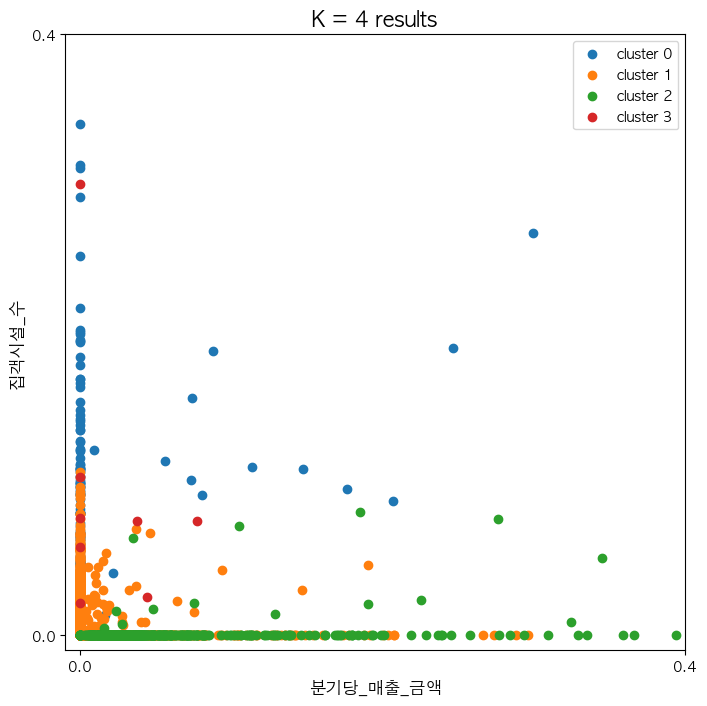

In [65]:
plt.figure(figsize = (8,8))

for i in range(k):
    plt.scatter(num_data.loc[num_data['cluster'] == i, '분기당_매출_금액'], 
                num_data.loc[num_data['cluster'] == i, '집객시설_수'], 
                label = 'cluster ' + str(i))
    
plt.legend()
plt.title('K = %d results'%k, size = 15)
plt.xlabel('분기당_매출_금액', size = 12)
plt.ylabel('집객시설_수', size = 12)
plt.xlim([-0.01, 0.4])
plt.xticks([0, 0.4])
plt.ylim([-0.01, 0.4])
plt.yticks([0, 0.4])
plt.show()

In [66]:
area0 = num_data[num_data['cluster'] == 0]
area0

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,cluster
상권_코드_명,,,,,,,,,,,,,,,,,,,
가산디지털단지역_1,0.0,0.174731,0.0,0.0,0.0,0.047428,0.083333,0.0,0.00000,0.000000,0.0,0.000000,0.000000,0.000000,0.233173,0.000000,0.0,0.0,0
가산디지털단지역_2,0.0,0.240332,0.0,0.0,0.0,0.101813,0.174603,0.0,0.00000,0.116279,0.0,0.000000,0.000000,0.008681,0.336538,0.000000,0.0,0.0,0
가산디지털단지역_3,0.0,0.218783,0.0,0.0,0.0,0.170742,0.121032,0.0,0.00000,0.127907,0.0,0.000000,0.012255,0.090278,0.637019,0.000000,0.0,0.0,0
강남구 논현역_1,0.0,0.021788,0.0,0.0,0.0,0.142917,0.051587,0.0,0.25000,0.180233,0.0,0.069444,0.000000,0.112847,0.201923,0.000000,0.0,0.0,0
강남구 논현역_2,0.0,0.085939,0.0,0.0,0.0,0.196459,0.063492,0.0,0.15625,0.267442,0.0,0.041667,0.000000,0.156250,0.139423,0.000000,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
혜화역 대학로_3,0.0,0.004550,0.0,0.0,0.0,0.065346,0.047619,0.0,0.00000,0.148256,0.0,0.000000,0.012255,0.104167,0.096154,0.068182,0.0,0.0,0
홍익대학교 주변,0.0,0.083230,0.0,0.0,0.0,0.340219,0.130952,0.0,0.00000,0.337209,0.0,0.000000,0.159314,0.607639,0.680288,0.000000,0.0,0.0,0
화곡로20길,0.0,0.003386,0.0,0.0,0.0,0.022344,0.000000,0.0,0.25000,0.061047,0.0,0.000000,0.000000,0.000000,0.069712,0.000000,0.0,0.0,0


In [67]:
area1 = num_data[num_data['cluster'] == 1]
area1

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,cluster
상권_코드_명,,,,,,,,,,,,,,,,,,,
4.19민주묘지역 2번,0.0,0.000000,0.0,0.056830,0.033086,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.012894,0.011020,1
63빌딩,0.0,0.000000,0.0,0.015086,0.001323,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.031690,0.031395,1
DMC(디지털미디어시티),0.0,0.000000,0.0,0.050213,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.203675,0.190337,1
KB국민은행 망원동지점,0.0,0.000000,0.0,0.107474,0.066570,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.035935,0.027316,1
KB국민은행 서강지점,0.0,0.000000,0.0,0.030312,0.002250,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.032056,0.024647,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
흑리단길,0.0,0.000000,0.0,0.025088,0.001323,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.035732,0.029476,1
흑석2치안센터,0.0,0.000000,0.0,0.035572,0.030439,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000,1
흑석로13길,0.0,0.000735,0.0,0.000000,0.000000,0.016020,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.017361,0.012019,0.0,0.000000,0.000000,1


In [68]:
area2 = num_data[num_data['cluster'] == 2]
area2

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,cluster
상권_코드_명,,,,,,,,,,,,,,,,,,,
GS강동자이아파트,0.0,0.0,0.0,0.162994,0.078216,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019868,0.015362,2
G타워,0.0,0.0,0.0,0.207774,0.019852,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.057567,0.045893,2
NH농협은행 보광동지점,0.0,0.0,0.0,0.185643,0.039704,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045679,0.031574,2
가로수길,0.0,0.0,0.0,0.158426,0.081260,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.097209,0.094860,2
가산동우체국,0.0,0.0,0.0,0.147307,0.041821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.065012,0.047901,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
화원중학교,0.0,0.0,0.0,0.297846,0.244706,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077456,0.052830,2
효창공원앞역 2번,0.0,0.0,0.0,0.146606,0.114611,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.009660,0.008171,2
효창공원앞역 6번,0.0,0.0,0.0,0.169630,0.147300,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.019707,0.016423,2


In [69]:
area3 = num_data[num_data['cluster'] == 3]
area3

,총_생활인구_수,총_직장_인구_수,점포_수,총_상주인구_수,아파트_단지_수,집객시설_수,은행_수,종합병원_수,일반_병원_수,약국_수,백화점_수,슈퍼마켓_수,극장_수,숙박_시설_수,교통시설_수,학교_수,분기당_매출_금액,분기당_매출_건수,cluster
상권_코드_명,,,,,,,,,,,,,,,,,,,
강남 마이스 관광특구,0.024849,0.151712,0.127723,0.001176,0.000000,0.076307,0.146825,0.0,0.00,0.055233,1.0,0.000000,0.073529,0.000000,0.233173,0.000000,0.077238,0.077726,3
건대입구역,0.000000,0.000229,0.000000,0.000000,0.000000,0.021501,0.037698,0.0,0.00,0.031977,1.0,0.000000,0.000000,0.000000,0.038462,0.000000,0.000000,0.000000,3
구로역,0.000000,0.001917,0.000000,0.098632,0.006617,0.025506,0.015873,0.0,0.25,0.046512,1.0,0.000000,0.000000,0.000000,0.076923,0.000000,0.044061,0.040612,3
롯데백화점,0.000000,0.258981,0.000000,0.000000,0.000000,0.077993,0.069444,0.0,0.00,0.031977,1.0,0.000000,0.110294,0.000000,0.112981,0.000000,0.000000,0.000000,3
명동 남대문 북창동 다동 무교동 관광특구,0.988632,1.000000,0.945545,0.050015,0.000000,0.894393,0.964286,0.0,0.00,0.912791,1.0,0.152778,0.625000,0.263889,0.956731,0.034091,0.477201,0.484237,3
서울 강남구 한티역,0.000000,0.006420,0.000000,0.000000,0.000000,0.058811,0.000000,0.0,0.00,0.116279,1.0,0.000000,0.000000,0.052083,0.038462,0.000000,0.000000,0.000000,3
서울 강북구 미아삼거리역_1,0.000000,0.001335,0.000000,0.000000,0.000000,0.105607,0.025794,0.0,0.25,0.130814,1.0,0.000000,0.000000,0.017361,0.223558,0.000000,0.000000,0.000000,3
서울 서대문구 신촌역,0.000000,0.008814,0.000000,0.000000,0.000000,0.300801,0.063492,0.0,0.00,0.311047,1.0,0.000000,0.012255,0.635417,0.389423,0.090909,0.000000,0.000000,3
코엑스,0.000000,0.151712,0.000000,0.000986,0.000000,0.076307,0.146825,0.0,0.00,0.055233,1.0,0.000000,0.073529,0.000000,0.233173,0.000000,0.037639,0.041962,3
